# Support Vector Machines - SVM
---
The fundamental idea behind SVMs is best explained with some pictures of the ***Iris Dataset***.


![Linear Regression vs SVM](./images/linReg_vs_svm.png)


The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers.  
The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classi‐ fier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.  

"*You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called large margin classification.*" (GÉRON, 2019)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

<br><br>

### Important note 1
SVMs are sensitive to the feature scales, as you will see below:

<br><br>

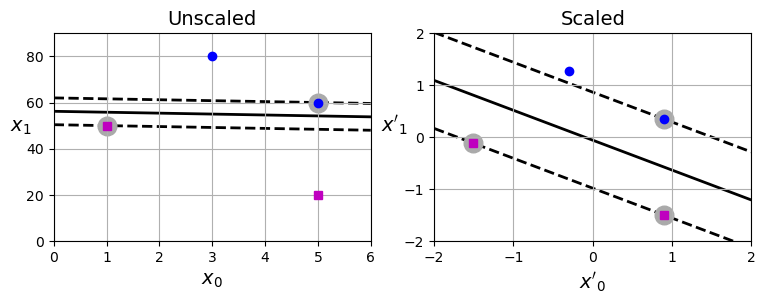

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

In the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary in the right plot looks much better.

## Hard Margin vs Soft Margin
---

If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification.  

There are two main issues with hard margin classification:
1.  It only works if the data is linearly separable;
2.  It is sensitive to outliers.

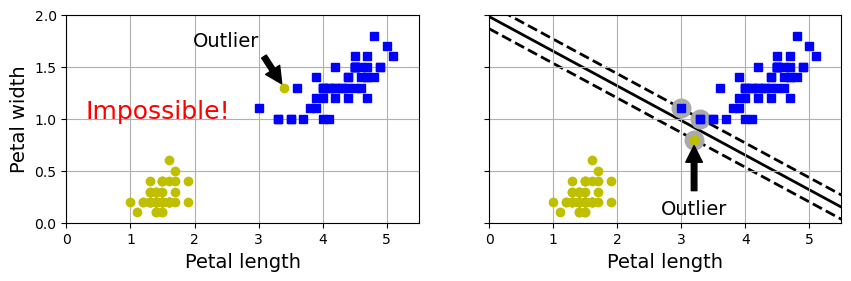

In [3]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

The image above shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin.

On the right, the decision boundary ends up very different tight with the outlier, and it will probably not generalize as well (see the first image of this notebook to remeber how larger was the decision boundary without the outlier).

To avoid these issues, we often use a more flexible model. The objective is to find a good balance between keeping the boundary as large as possible and limiting the margin violations (i.e., instances that end up bewteen the limits of the boundary or even on the wrong side).

This is called soft margin classification. When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters. $C$ is one of those hyperparameters.

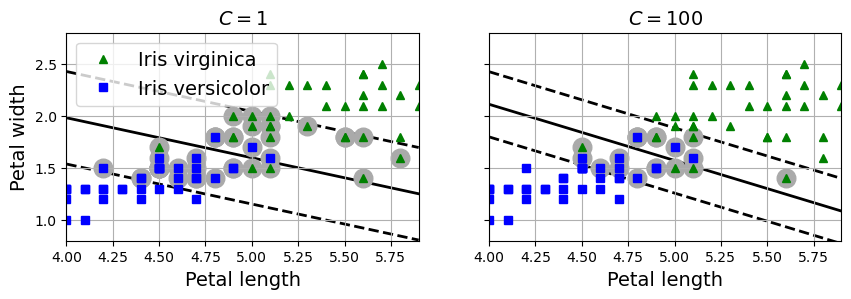

In [4]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

If we set $C$ to a low value, then we end up with the model on the left. With a high value, we get the model on the right.

Margin violations are bad. It’s usually better to have few of them. However, in this case the model on the left has a lot of margin violations but will probably generalize better.

<br><br>

### Important note 2
If your SVM model is overfitting, you can try regularizing it by reducing $C$.

<br><br>

# Nonlinear SVM Classification
---
So far we only discussed about SVM being used as a better predictor than regular Linear Regression models, showing some examples of it. But the power of SVM goes much further:
* Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable!
    *   One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

![Difference between a 1 dimension plot (not linearly separable) and a 2 dimensional plot (linearly separable)](./images/1_vs_2_dimensions_plot.png)

Note that the dataset is not linearly separable (left), as you can see. But if you add a second feature $x2 = (x1)^2$ , the resulting 2D dataset is perfectly linearly separable.

Keep this idea in mind while we play around with the make_moons method and SVMs:
*   In the example below, we will train a SVM using Polynomia Features

<a href="" id="unique-id"></a>

In [5]:
# To implement this idea using Scikit-Learn, create a Pipeline
# containing a PolynomialFeatures transformer, followed by a
# StandardScaler and a LinearSVC. Let’s test this on the moons dataset:
# this is a toy dataset for binary classification in which the data
# points are shaped as two interleaving half circles.

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=200, noise=0.1)
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
])

poly_svm_clf.fit(X, y)

d:\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

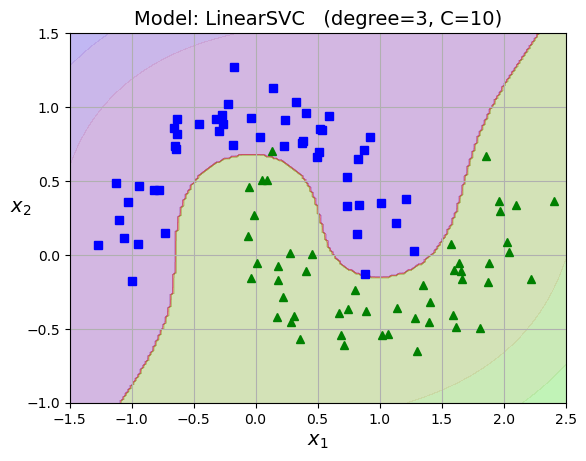

In [6]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title("Model: LinearSVC   (degree=3, C=10)")

plt.show()

As you can se above, using Polynomial Features makes the model able to squiggle around the dataset, finding the best fit to the boundary line.  
Below we will explore a bit more about Polynomial Features:

## Polynomial Kernel
---

Adding **polynomial features** is simple to implement and can work great with all sorts of Machine Learning algorithms (not just *SVMs*).  
That said:
*   At **low** polynomial degree, this method cannot deal with very complex datasets;
*   At **high** polynomial degree it creates a huge number of features, making the model *too slow*.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the ***kernel trick*** (explained shortly below).  
The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them.  

So there is no combinatorial explosion of the number of features because you don’t actually add any features.  
This trick is implemented by the SVC class. Let’s test it on the moons dataset:

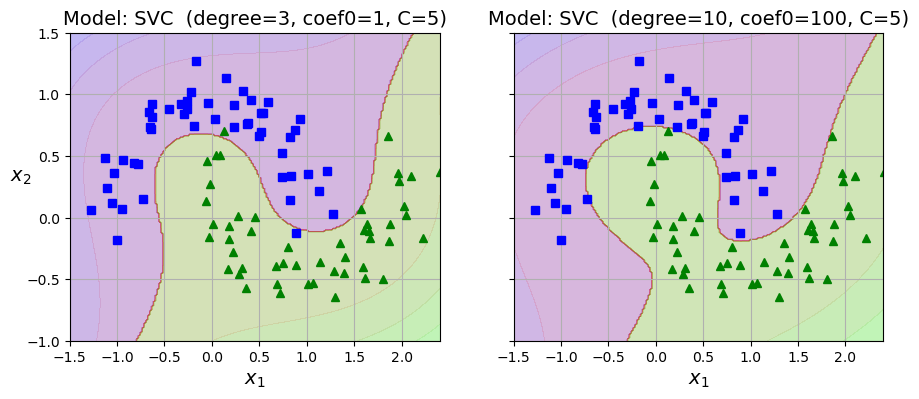

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("Model: SVC  (degree=3, coef0=1, C=5)")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("Model: SVC  (degree=10, coef0=100, C=5)")
plt.ylabel("")

plt.show()

<br><br>

### Important Note 3:
A common approach to finding the right hyperparameter values is to use Grid Search. *<a href="../Projects/End-to-End Project/End_to_end_project.ipynb">You can check a project where I used Grid Search here!</a>*  

It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparame‐ ter space.

<br><br>

##  Gaussian RBF
---

Equation:  

$\phi_\gamma(x, l) = exp (-\gamma \times|| x - l ||^2)$

This technique to tackle nonlinear problems add features computed using a similarity function, which measures how much each instance resembles a particular landmark.  
For example, let’s take the 1D dataset [discussed earlier](#unique-id) and add two landmarks to it at:
*   $x_1 = –2$
*   $x_1 = 1$.

Next, let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with:
*   $\gamma$ = 0.3


<img src="./images/kernel_method_plot.png" width="1200" height="600">

* You may wonder how to select the landmarks.
    1. The simplest approach is to create a landmark at the location of each and every instance in the dataset.  
    
    Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.  
    The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming you drop the original features).
    
        If your training set is very large, you end up with an equally large number of features.

Just like the polynomial features method, the *similarity features* method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets.  
Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features.

Let’s try the **SVC class** with the *Gaussian RBF kernel*:

In [8]:
from sklearn.svm import SVC

rbf_kernel_svm = Pipeline([
    ("Scaler", StandardScaler()),
    ("svm_classifier", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm.fit(X, y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('svm_classifier', SVC(C=0.001, gamma=5))])

Lets plot the graph of this prediction:

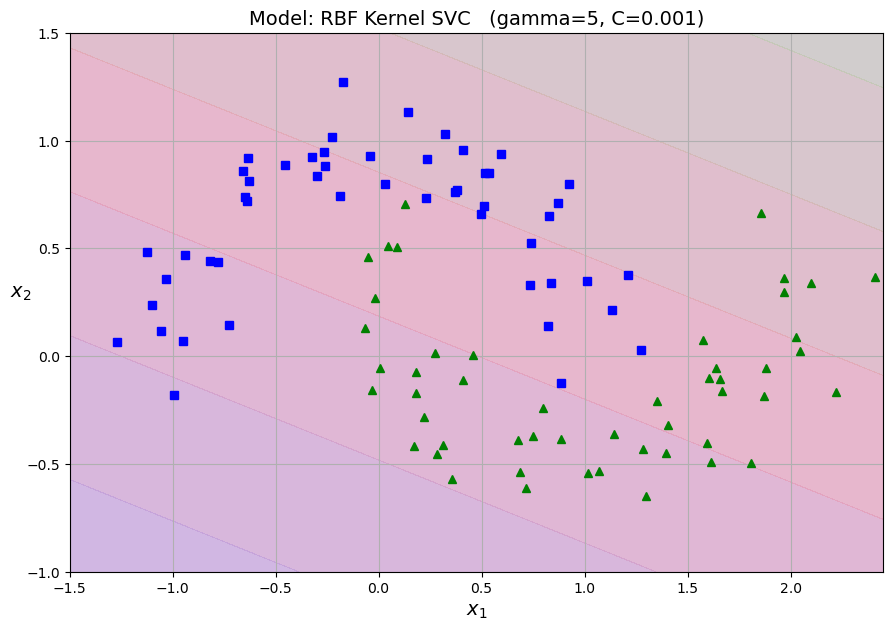

In [9]:
gamma = 5
C = 0.001

fig, axes = plt.subplots(figsize=(10.5, 7))

plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(f"Model: RBF Kernel SVC   (gamma={gamma}, C={C})")

plt.show()

Below we will show other plots, showing models trained with different values of hyperparameters gamma ($\gamma$) and $C$.  

Increasing $\gamma$ (gamma) makes the bell-shaped curve **narrower**. As a result, each instance’s range of influence is smaller:  
*   The decision boundary ends up being more irregular, wiggling around individual instances.
*   Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother.

So $\gamma$ (gamma) acts like a **regularization** hyperparameter: if your model is overfitting, you should reduce it;  
if it is underfitting, you should increase it (similar to the $C$ hyperparameter).

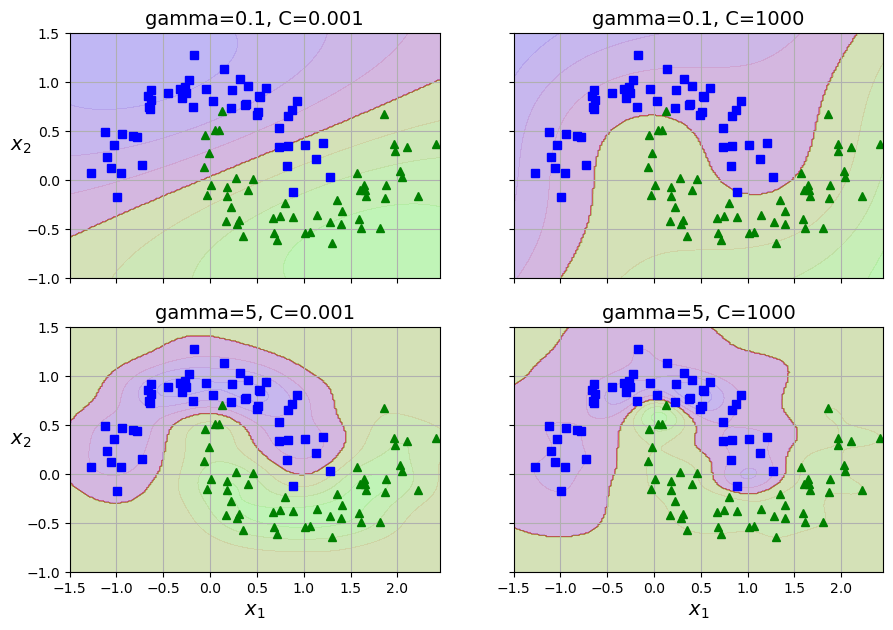

In [10]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### *Kernel Magic Trick*
---
It is as paper written by [John Platt](https://research.google/people/john-c-platt/) where he proposes a new algorithm for training support vector machines: *Sequential Minimal Optimization*, or SMO.  

It solves some problems:
1.   Training a support vector machine requires the solution of a very large quadratic programming (QP) optimization problem.
2.   Chunking algorithms requires matrix computation, which involves a lot of memory for large datasets.

Because:
*   SMO breaks this large QP problem into a series of smallest possible QP problems.  
    These small QP problems are solved analytically, which avoids using a time-consuming numerical QP optimization as an inner loop.
*   The amount of memory required for **SMO** is linear in the training set size, which allows SMO to handle very large training sets.

<br><br>

If you want to read the full paper, you can [click here!](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

<br><br>


## SVM: Other Applications
---
In addition to its great capacity as a classifier, the SVM also has the ability to act as a regressor.

### SVM Regression
To use SVMs for regression instead of classification, the trick is to reverse the objective:
*   Instead of trying to fit the largest possible street between two classes while limiting margin violations,  
    SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances *out* of the margins).  

The width of the margin is controlled by a hyperparameter, $\epsilon$, as you can see below:

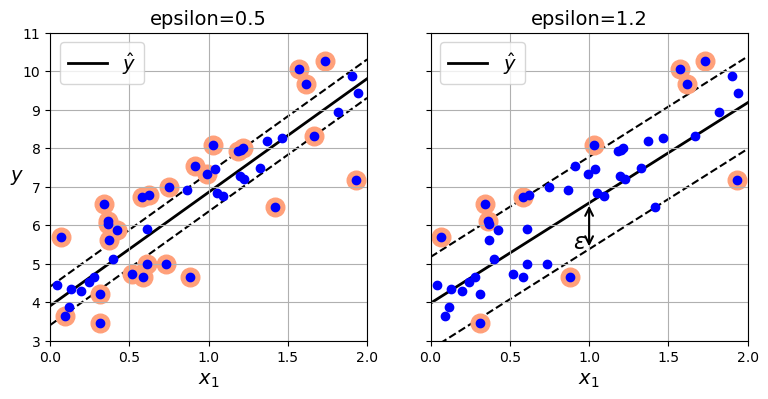

In [11]:
from sklearn.svm import LinearSVR

# Creating an artificial dataset:
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)


# Creating support function the find the svm
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

# Creating the support function to plot the SVM
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='lightsalmon', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

For handling Polynomial Features, the logic remains the same:

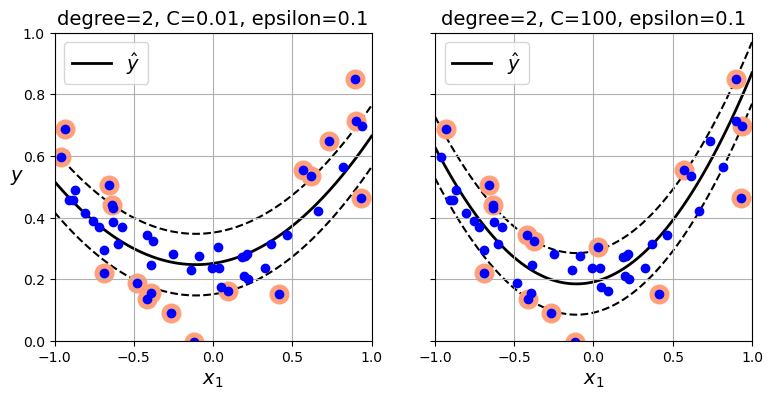

In [12]:
from sklearn.svm import SVR

# Create the artificial dataset:
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# Create a small pipeline for data processing
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

# Hands-On
---
## Using LinearSVC, SVC and SGDClassifier to train a linearly separable dataset

In [13]:
# importing the libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [42]:
# for this example we will be using iris dataset
iris = datasets.load_iris(as_frame=True)

# to visualize better, we will use only 2 features.
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# for that, we need to filter only 2 species:
setosa_or_versicolor = (y == 1) | (y == 0)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# regularizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

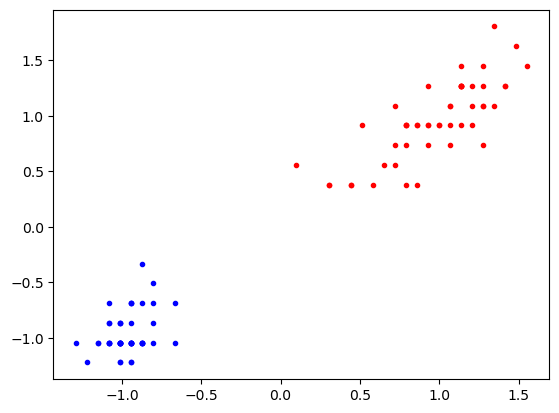

In [44]:
# plotting data for visualization
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], 'b.')
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], 'r.')

Now let's build and train 3 models:
* Remember that `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models to produce similar results, we need to set `loss="hinge"`.
* Also, the `SVC` class uses an RBF kernel by default, so we need to set `kernel="linear"` to get similar results as the other two models.
* Lastly, the `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [45]:
# training the models:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

svc = SVC(kernel="linear", C=5, random_state=100)
lin_svc = LinearSVC(loss="hinge", C=5, random_state=100)
sgdc = SGDClassifier(alpha=0.05, random_state=100)

svc.fit(X_scaled, y)
lin_svc.fit(X_scaled, y)
sgdc.fit(X_scaled, y)


SGDClassifier(alpha=0.05, random_state=100)

In [56]:
def get_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

To understand why we compute the boundary decision line using the ratio $ \frac{\text{coef\_}[0, 0]}{\text{coef\_}[0, 1]} $, it's important to delve into the geometric interpretation of the coefficients in the context of Support Vector Machines (SVM).

### Linear SVM and Decision Boundary

For a linear SVM, the decision function is of the form:
$ f(x) = w^T x + b $
where:
- $ w $ (weights) is a vector of coefficients.
- $ b $ (bias) is the intercept.

The decision boundary is where the decision function equals zero:
$ w^T x + b = 0 $

For a 2-dimensional feature space ($ x = [x_1, x_2] $):
$ w_1 x_1 + w_2 x_2 + b = 0 $
where $ w_1 $ and $ w_2 $ are the components of the weight vector $ w $.

### Slope of the Decision Boundary

To express the decision boundary in a more familiar form, we solve for $ x_2 $:
$ x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} $

The term $ -\frac{w_1}{w_2} $ is the slope of the decision boundary.

### Coefficients in scikit-learn's SVC

In scikit-learn's `SVC` class, the `coef_` attribute contains the coefficients $ w $. For a linear SVM with two features, `coef_` is a 2D array with shape (1, 2), where:
$ \text{coef\_} = [[w_1, w_2]] $

To find the slope of the decision boundary, we take the ratio:
$ \frac{\text{coef\_}[0, 0]}{\text{coef\_}[0, 1]} = \frac{w_1}{w_2} $

### Summary

Thus, to compute the slope of the decision boundary line, we use the ratio of the coefficients:
$ \text{slope} = -\frac{\text{coef\_}[0,0]}{\text{coef\_}[0,1]} $

This gives us the slope of the line that separates the classes in a 2D feature space.

In [57]:
svc_line = get_boundary(svc)
lin_svc_line = get_boundary(lin_svc)
sgdc_line = get_boundary(sgdc)

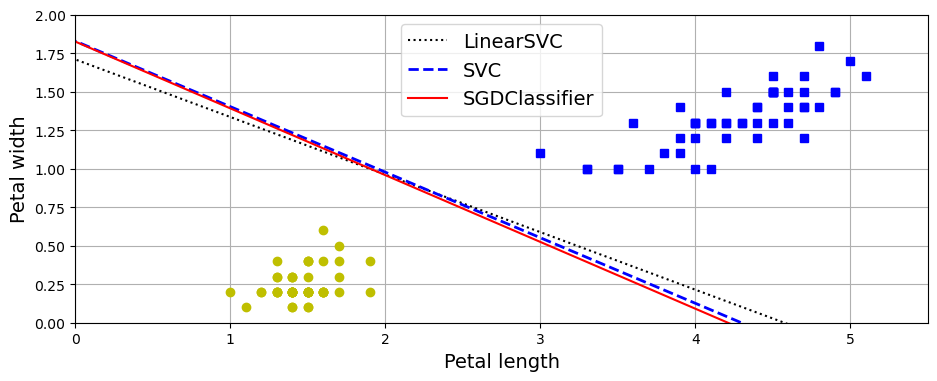

In [58]:
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_svc_line[:, 0], lin_svc_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgdc_line[:, 0], sgdc_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label= "Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label= "Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

All three models seems very close to one another, thats fair enough!

## Using SVM on the Wine dataset
---
The Wine Recognition dataset is a classic benchmark dataset widely used in machine learning for classification tasks.  
It provides valuable insights into wine classification based on various chemical attributes.

### Understanding the Wine Dataset
The original Wine dataset was created by **Forina, M. et al**, as part of the **PARVUS project**, an Extendible Package for Data Exploration, Classification, and Correlation, conducted at the Institute of Pharmaceutical and Food Analysis and Technologies, Genoa, Italy.
*   Read the full article [here](https://www.geeksforgeeks.org/wine-dataset/)

In [63]:
# the wine dataset is in the scikit-learn datasets module
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [64]:
wine = datasets.load_wine(as_frame=True)

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [65]:
X = wine.data
y = wine.target

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [67]:
y.unique()

array([0, 1, 2])

Since SVM classifiers are binary classifiers, we will need to use one-versus-all to classify all 3 classes.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=100)

### Using the LinearSVC

In [72]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(dual=True, random_state=100)
lin_svc.fit(X_train, y_train)

d:\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=100)

<span style="color: yellow">It failed to converge!! What could be the reason?</span>

Let's try increasing the number of iterations, as said in the `ConvergenceWarning`

In [74]:
lin_svc = LinearSVC(dual=True, random_state=100, max_iter=100000)
lin_svc.fit(X_train, y_train)

d:\Anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100000, random_state=100)

<span style="color: yellow">Even increasing 100x the max_iter hyperparameter, it failed to converge!</span>

Let's try another approach

In [92]:
print(f"{'feature': <40}{'min': <15} max")
for i in X_train.columns:
    print(f"{i: <40}{X_train[i].min(): <10}\t{X_train[i].max()}")

feature                                 min             max
alcohol                                 11.03     	14.83
malic_acid                              0.74      	5.8
ash                                     1.36      	3.23
alcalinity_of_ash                       10.6      	30.0
magnesium                               70.0      	139.0
total_phenols                           1.1       	3.88
flavanoids                              0.47      	5.08
nonflavanoid_phenols                    0.17      	0.66
proanthocyanins                         0.41      	3.58
color_intensity                         1.28      	10.68
hue                                     0.55      	1.71
od280/od315_of_diluted_wines            1.27      	4.0
proline                                 278.0     	1680.0


As you can see above, the amplitude from the features varies, making hard for the model to converge and set a good boundary.

<span style="color: salmon; font-size: 30px">Always remeber to SCALE the features!!</span>

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"{'feature': <40}{'min': <15} max")
for i in X_train_scaled.columns:
    print(f"{i: <40}{X_train[i].min(): <10}\t{X_train[i].max()}")

feature                                 min             max


AttributeError: 'numpy.ndarray' object has no attribute 'columns'